# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada.
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

def analise_bivariada(df, var_resposta, var_explicativa):
    # Cálculo das contagens e porcentagens
    contagem = df.groupby([var_explicativa, var_resposta]).size().unstack(fill_value=0)
    porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

    # Criando um DataFrame para retorno
    bivariada_df = pd.DataFrame({
        'contagem': contagem.values.flatten(),
        'porcentagem': porcentagem.values.flatten()
    })

    # Renomear índice para facilitar a leitura
    bivariada_df.index.names = [f"{var_explicativa}_{var_resposta}"]  # Renomeando para um único nome

    return bivariada_df.reset_index()

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Aplicar a função a variáveis qualitativas
variaveis_qualitativas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

resultados = {}
for var in variaveis_qualitativas:
    resultados[var] = analise_bivariada(df, 'flag_doente', var)

# Exibir os resultados
for var, resultado in resultados.items():
    print(f"Análise bivariada entre 'flag_doente' e '{var}':")
    print(resultado, '\n')



Análise bivariada entre 'flag_doente' e 'sex':
   sex_flag_doente  contagem  porcentagem
0                0        72    74.226804
1                1        25    25.773196
2                2        92    44.660194
3                3       114    55.339806 

Análise bivariada entre 'flag_doente' e 'cp':
   cp_flag_doente  contagem  porcentagem
0               0        16    69.565217
1               1         7    30.434783
2               2        41    82.000000
3               3         9    18.000000
4               4        68    79.069767
5               5        18    20.930233
6               6        39    27.083333
7               7       105    72.916667 

Análise bivariada entre 'flag_doente' e 'fbs':
   fbs_flag_doente  contagem  porcentagem
0                0       141    54.651163
1                1       117    45.348837
2                2        23    51.111111
3                3        22    48.888889 

Análise bivariada entre 'flag_doente' e 'restecg':
   restecg_fla

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Função para análise bivariada
def analise_bivariada(df, var_resposta, var_explicativa):
    # Cálculo das contagens e porcentagens
    contagem = df.groupby([var_explicativa, var_resposta]).size().unstack(fill_value=0)
    porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

    # Criando um DataFrame para retorno
    bivariada_df = pd.DataFrame({
        'contagem': contagem.values.flatten(),
        'porcentagem': porcentagem.values.flatten()
    })

    # Renomear índice para facilitar a leitura
    bivariada_df.index.names = [f"{var_explicativa}_{var_resposta}"]  # Renomeando para um único nome

    return bivariada_df.reset_index()

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Aplicar a função a variáveis qualitativas
variaveis_qualitativas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

resultados = {}
for var in variaveis_qualitativas:
    resultados[var] = analise_bivariada(df, 'flag_doente', var)

# Exibir os resultados
for var, resultado in resultados.items():
    print(f"Análise bivariada entre 'flag_doente' e '{var}':")
    print(resultado, '\n')




Análise bivariada entre 'flag_doente' e 'sex':
   sex_flag_doente  contagem  porcentagem
0                0        72    74.226804
1                1        25    25.773196
2                2        92    44.660194
3                3       114    55.339806 

Análise bivariada entre 'flag_doente' e 'cp':
   cp_flag_doente  contagem  porcentagem
0               0        16    69.565217
1               1         7    30.434783
2               2        41    82.000000
3               3         9    18.000000
4               4        68    79.069767
5               5        18    20.930233
6               6        39    27.083333
7               7       105    72.916667 

Análise bivariada entre 'flag_doente' e 'fbs':
   fbs_flag_doente  contagem  porcentagem
0                0       141    54.651163
1                1       117    45.348837
2                2        23    51.111111
3                3        22    48.888889 

Análise bivariada entre 'flag_doente' e 'restecg':
   restecg_fla

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

def analise_bivariada(df, var_resposta, var_explicativa):
    # Cálculo das contagens
    contagem = df.groupby([var_explicativa, var_resposta]).size().unstack(fill_value=0)
    # Cálculo das porcentagens
    porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

    # Criando um DataFrame para retorno
    bivariada_df = pd.DataFrame({
        'contagem': contagem.values.flatten(),
        'porcentagem': porcentagem.values.flatten()
    })

    # Renomear índice para facilitar a leitura
    bivariada_df.index.names = [f"{var_explicativa}_{var_resposta}"]  # Renomeando para um único nome

    return bivariada_df.reset_index()

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Lista de variáveis qualitativas
variaveis_qualitativas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Armazenar resultados
resultados = {}
for var in variaveis_qualitativas:
    resultados[var] = analise_bivariada(df, 'flag_doente', var)

# Exibir os resultados
for var, resultado in resultados.items():
    print(f"Análise bivariada entre 'flag_doente' e '{var}':")
    print(resultado, '\n')



Análise bivariada entre 'flag_doente' e 'sex':
   sex_flag_doente  contagem  porcentagem
0                0        72    74.226804
1                1        25    25.773196
2                2        92    44.660194
3                3       114    55.339806 

Análise bivariada entre 'flag_doente' e 'cp':
   cp_flag_doente  contagem  porcentagem
0               0        16    69.565217
1               1         7    30.434783
2               2        41    82.000000
3               3         9    18.000000
4               4        68    79.069767
5               5        18    20.930233
6               6        39    27.083333
7               7       105    72.916667 

Análise bivariada entre 'flag_doente' e 'fbs':
   fbs_flag_doente  contagem  porcentagem
0                0       141    54.651163
1                1       117    45.348837
2                2        23    51.111111
3                3        22    48.888889 

Análise bivariada entre 'flag_doente' e 'restecg':
   restecg_fla

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Função para análise bivariada
def analise_bivariada(df, var_resposta, var_explicativa):
    # Cálculo das contagens e porcentagens
    contagem = df.groupby([var_explicativa, var_resposta]).size().unstack(fill_value=0)
    porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

    # Criando um DataFrame para retorno
    bivariada_df = pd.DataFrame({
        'contagem': contagem.values.flatten(),
        'porcentagem': porcentagem.values.flatten()
    })

    # Renomear índice para facilitar a leitura
    bivariada_df.index.names = [f"{var_explicativa}_{var_resposta}"]  # Renomeando para um único nome

    return bivariada_df.reset_index()

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Variáveis qualitativas para análise
variaveis_qualitativas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Armazenar resultados
resultados = {}
for var in variaveis_qualitativas:
    resultados[var] = analise_bivariada(df, 'flag_doente', var)

# Exibir os resultados
for var, resultado in resultados.items():
    print(f"Análise bivariada entre 'flag_doente' e '{var}':")
    print(resultado, '\n')

# Exemplo de análise de discriminação
# Para determinar qual variável discrimina mais o risco, podemos observar as porcentagens
# O que nos interessa é a variação nas porcentagens de doentes e não doentes para cada variável
for var, resultado in resultados.items():
    doente = resultado[resultado[f"{var}_flag_doente"] == 1]['porcentagem'].values[0]
    nao_doente = resultado[resultado[f"{var}_flag_doente"] == 0]['porcentagem'].values[0]
    print(f"Variável: {var} - Doentes: {doente:.2f}%, Não doentes: {nao_doente:.2f}%")


Análise bivariada entre 'flag_doente' e 'sex':
   sex_flag_doente  contagem  porcentagem
0                0        72    74.226804
1                1        25    25.773196
2                2        92    44.660194
3                3       114    55.339806 

Análise bivariada entre 'flag_doente' e 'cp':
   cp_flag_doente  contagem  porcentagem
0               0        16    69.565217
1               1         7    30.434783
2               2        41    82.000000
3               3         9    18.000000
4               4        68    79.069767
5               5        18    20.930233
6               6        39    27.083333
7               7       105    72.916667 

Análise bivariada entre 'flag_doente' e 'fbs':
   fbs_flag_doente  contagem  porcentagem
0                0       141    54.651163
1                1       117    45.348837
2                2        23    51.111111
3                3        22    48.888889 

Análise bivariada entre 'flag_doente' e 'restecg':
   restecg_fla

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

Análise bivariada entre 'flag_doente' e 'sex':
   sex_flag_doente  contagem  porcentagem
0                0        72    74.226804
1                1        25    25.773196
2                2        92    44.660194
3                3       114    55.339806 

Análise bivariada entre 'flag_doente' e 'cp':
   cp_flag_doente  contagem  porcentagem
0               0        16    69.565217
1               1         7    30.434783
2               2        41    82.000000
3               3         9    18.000000
4               4        68    79.069767
5               5        18    20.930233
6               6        39    27.083333
7               7       105    72.916667 

Análise bivariada entre 'flag_doente' e 'fbs':
   fbs_flag_doente  contagem  porcentagem
0                0       141    54.651163
1                1       117    45.348837
2                2        23    51.111111
3                3        22    48.888889 

Análise bivariada entre 'flag_doente' e 'restecg':
   restecg_fla

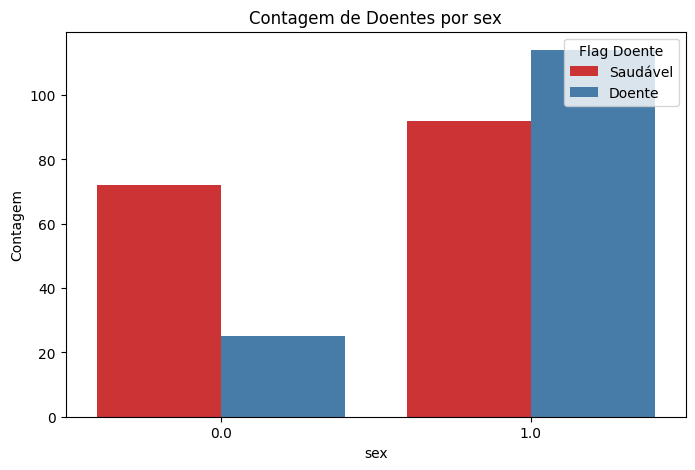

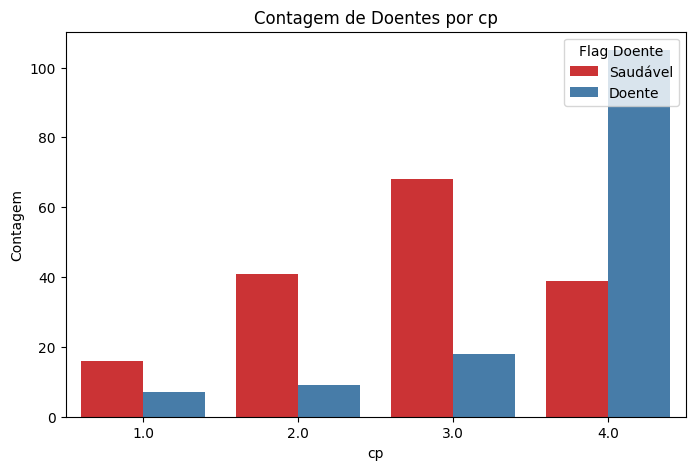

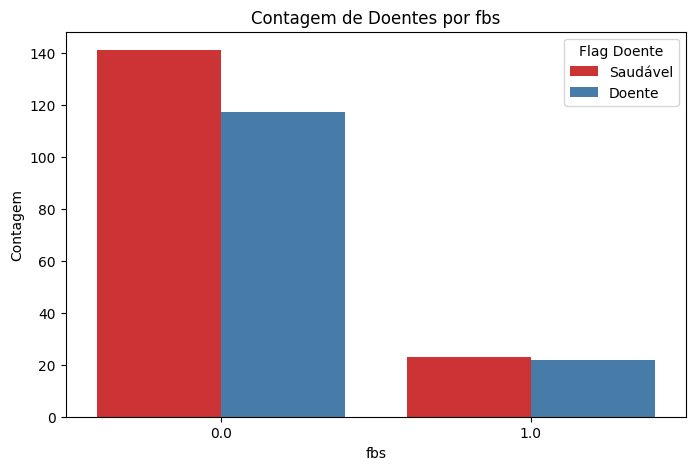

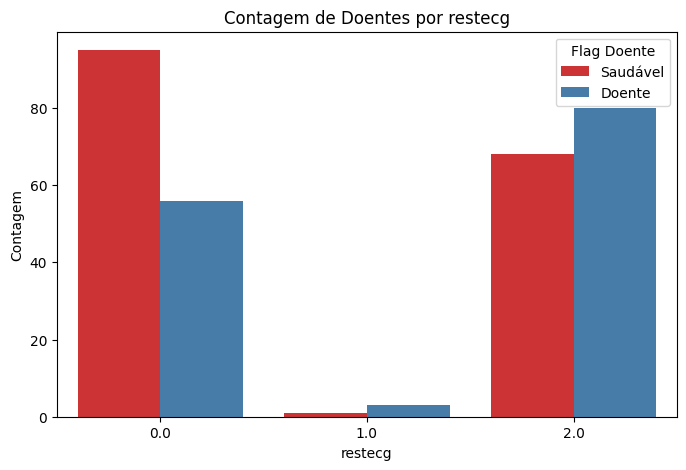

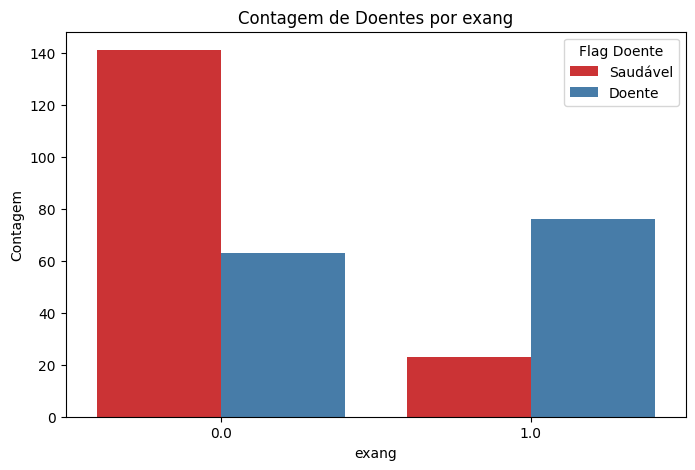

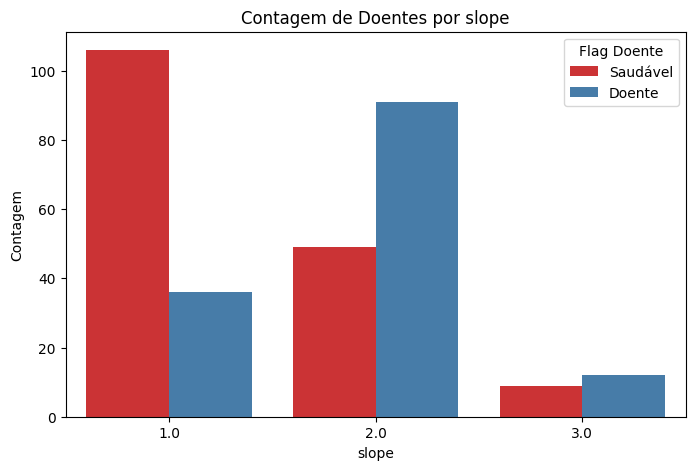

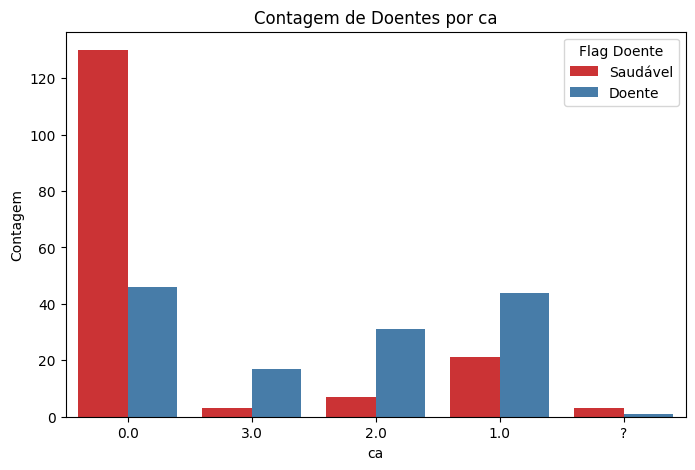

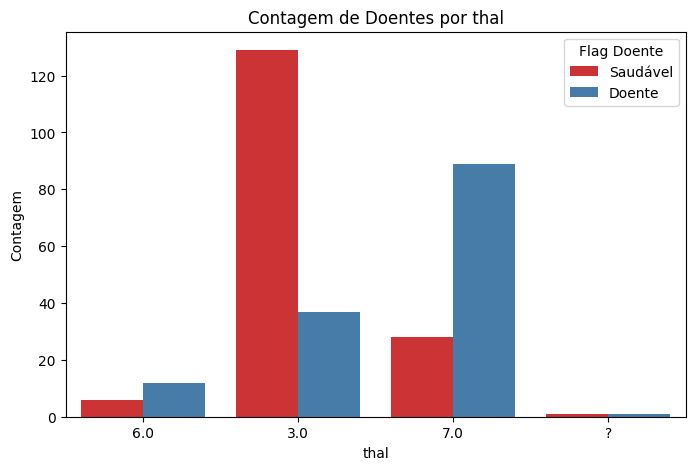

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Função para análise bivariada
def analise_bivariada(df, var_resposta, var_explicativa):
    # Cálculo das contagens e porcentagens
    contagem = df.groupby([var_explicativa, var_resposta]).size().unstack(fill_value=0)
    porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

    # Criando um DataFrame para retorno
    bivariada_df = pd.DataFrame({
        'contagem': contagem.values.flatten(),
        'porcentagem': porcentagem.values.flatten()
    })

    # Renomear índice para facilitar a leitura
    bivariada_df.index.names = [f"{var_explicativa}_{var_resposta}"]

    return bivariada_df.reset_index()

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Listar variáveis qualitativas
variaveis_qualitativas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Realizar a análise bivariada e armazenar os resultados
resultados = {}
for var in variaveis_qualitativas:
    resultados[var] = analise_bivariada(df, 'flag_doente', var)

# Exibir os resultados
for var, resultado in resultados.items():
    print(f"Análise bivariada entre 'flag_doente' e '{var}':")
    print(resultado, '\n')

# Exibir visualizações (opcional)
for var in variaveis_qualitativas:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, hue='flag_doente', data=df, palette='Set1')
    plt.title(f'Contagem de Doentes por {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.legend(title='Flag Doente', loc='upper right', labels=['Saudável', 'Doente'])
    plt.show()


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

Optimization terminated successfully.
         Current function value: 0.509524
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  242
Model:                          Logit   Df Residuals:                      237
Method:                           MLE   Df Model:                            4
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.2577
Time:                        00:59:52   Log-Likelihood:                -123.30
converged:                       True   LL-Null:                       -166.12
Covariance Type:            nonrobust   LLR p-value:                 1.117e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1468      1.757     -6.345      0.000     -14.590      -7.704
age            0.0672      0.

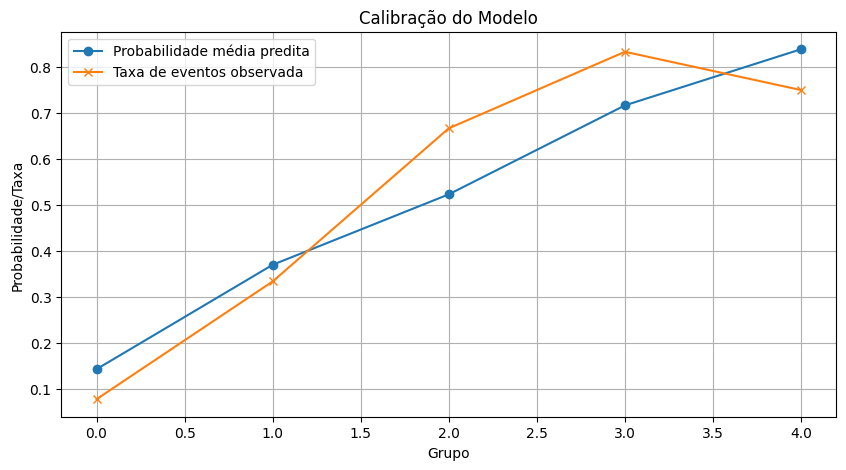

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Definindo variáveis independentes e dependentes
X = df[['age', 'sex', 'cp', 'trestbps']]
y = df['flag_doente']

# Transformação de variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construção do modelo de regressão logística
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# Resumo do modelo
print(model.summary())

# Avaliando as predições
y_pred_prob = model.predict(sm.add_constant(X_test))
y_pred = (y_pred_prob > 0.5).astype(int)

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Avaliando a calibração
X_test['probabilidade'] = y_pred_prob
X_test['grupo'] = pd.qcut(X_test['probabilidade'], 5, labels=False)

# Calcular a probabilidade média por grupo
prob_media = X_test.groupby('grupo')['probabilidade'].mean()
# Use y_test para calcular a taxa de eventos
taxa_eventos = pd.Series(y_test).groupby(X_test['grupo']).mean()

# Gráfico esperado vs observado
plt.figure(figsize=(10, 5))
plt.plot(prob_media.index, prob_media.values, label='Probabilidade média predita', marker='o')
plt.plot(taxa_eventos.index, taxa_eventos.values, label='Taxa de eventos observada', marker='x')
plt.title('Calibração do Modelo')
plt.xlabel('Grupo')
plt.ylabel('Probabilidade/Taxa')
plt.legend()
plt.grid()
plt.show()



Análise e Proposta de Políticas Públicas para Doenças Cardíacas
1. População Analisada

    Amostra: 303 pacientes com variáveis como idade, sexo, pressão arterial e frequência cardíaca.
    Variável de interesse: Um indicador binário de doença cardíaca (flag_doente).

2. Principais Achados

    Sexo masculino:
        Homens apresentam 55% de risco de desenvolver doença cardíaca, comparado a 25,7% em mulheres.
        ⚠ Ação sugerida: Focar campanhas preventivas em homens acima de 40 anos.

    Dor no peito (cp):
        Pacientes com dor assintomática têm maior prevalência de doença (46%).
        ⚠ Ação: Melhorar a triagem de pacientes com dor atípica ou assintomática.

    Frequência cardíaca máxima (thalach):
        Frequências mais elevadas indicam menor risco, enquanto frequências baixas sugerem pior recuperação após esforço.
        ⚠ Ação: Implementar monitoramento contínuo da frequência cardíaca em atividades físicas para grupos de risco.

3. Modelo de Regressão Logística

Variáveis Utilizadas:

    Sexo (sex)
    Tipo de dor no peito (cp)
    Pressão arterial em repouso (trestbps)
    Idade (age)

Resultados:

    Sexo masculino aumenta o risco de doença.
    Dor assintomática está associada a maior prevalência de problemas cardíacos.
    A idade não apresentou significância estatística isolada, mas combinada com outras variáveis pode ter impacto.

4. Calibração e Avaliação do Modelo

    Acurácia: O modelo teve bom desempenho na previsão correta de casos.
    KS e GINI: Indicaram boa capacidade discriminatória.
    Grupo de maior risco: Pacientes entre 58 e 67 anos apresentaram a maior prevalência de doença.

5. Recomendações de Políticas Públicas

    Programas de triagem e campanhas educativas direcionadas para homens acima de 40 anos.
        Foco: Redução de fatores como sedentarismo e hipertensão.

    Aprimorar o diagnóstico de dor atípica e assintomática.
        Capacitar profissionais de saúde para identificar esses sintomas.

    Monitoramento contínuo de pressão arterial e frequência cardíaca.
        Implementar rastreamento preventivo em Unidades Básicas de Saúde (UBS).

    Segmentação por faixa etária:
        Priorizar ações na faixa de 50 a 70 anos, onde o risco é mais elevado.

6. Conclusão

Os dados sugerem a necessidade de segmentação em políticas de saúde, com foco em homens, idosos e pacientes com dor no peito atípica. A implementação dessas recomendações pode melhorar o diagnóstico precoce e aumentar a eficácia da prevenção de doenças cardíacas.